# Задание 1.1 - Метод К-ближайших соседей (K-neariest neighbor classifier)

В первом задании вы реализуете один из простейших алгоритмов машинного обучения - классификатор на основе метода K-ближайших соседей.
Мы применим его к задачам
- бинарной классификации (то есть, только двум классам)
- многоклассовой классификации (то есть, нескольким классам)

Так как методу необходим гиперпараметр (hyperparameter) - количество соседей, мы выберем его на основе кросс-валидации (cross-validation).

Наша основная задача - научиться пользоваться numpy и представлять вычисления в векторном виде, а также ознакомиться с основными метриками, важными для задачи классификации.

Перед выполнением задания:
- запустите файл `download_data.sh`, чтобы скачать данные, которые мы будем использовать для тренировки
- установите все необходимые библиотеки, запустив `pip install -r requirements.txt` (если раньше не работали с `pip`, вам сюда - https://pip.pypa.io/en/stable/quickstart/)

Если вы раньше не работали с numpy, вам может помочь tutorial. Например этот:  
http://cs231n.github.io/python-numpy-tutorial/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
%matplotlib inline

%load_ext autoreload
%autoreload 2

In [3]:
from dataset import load_svhn
from knn import KNN
from metrics import binary_classification_metrics, multiclass_accuracy

# Загрузим и визуализируем данные

В задании уже дана функция `load_svhn`, загружающая данные с диска. Она возвращает данные для тренировки и для тестирования как numpy arrays.

Мы будем использовать цифры из датасета Street View House Numbers (SVHN, http://ufldl.stanford.edu/housenumbers/), чтобы решать задачу хоть сколько-нибудь сложнее MNIST.

In [4]:
train_X, train_y, test_X, test_y = load_svhn("data", max_train=1000, max_test=100)

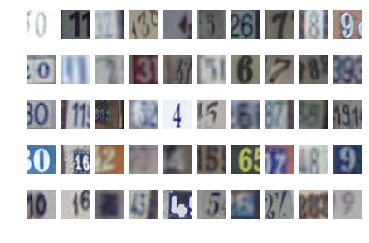

In [5]:
samples_per_class = 5  # Number of samples per class to visualize
plot_index = 1
for example_index in range(samples_per_class):
    for class_index in range(10):
        plt.subplot(5, 10, plot_index)
        image = train_X[train_y == class_index][example_index]
        plt.imshow(image.astype(np.uint8))
        plt.axis('off')
        plot_index += 1

# Сначала реализуем KNN для бинарной классификации

В качестве задачи бинарной классификации мы натренируем модель, которая будет отличать цифру 0 от цифры 9.

In [6]:
# First, let's prepare the labels and the source data

# Only select 0s and 9s
binary_train_mask = (train_y == 0) | (train_y == 9)
binary_train_X = train_X[binary_train_mask]
binary_train_y = train_y[binary_train_mask] == 0

binary_test_mask = (test_y == 0) | (test_y == 9)
binary_test_X = test_X[binary_test_mask]
binary_test_y = test_y[binary_test_mask] == 0

# Reshape to 1-dimensional array [num_samples, 3*3*32]
binary_train_X = binary_train_X.reshape(binary_train_X.shape[0], -1)
binary_test_X = binary_test_X.reshape(binary_test_X.shape[0], -1)

In [7]:
# Create the classifier and call fit to train the model
# KNN just remembers all the data
knn_classifier = KNN(k=1)
knn_classifier.fit(binary_train_X, binary_train_y)

## Пришло время написать код! 

Последовательно реализуйте функции `compute_distances_two_loops`, `compute_distances_one_loop` и `compute_distances_no_loops`
в файле `knn.py`

In [8]:
# TODO: implement compute_distances_two_loops in knn.py
dists = knn_classifier.compute_distances_two_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))

In [9]:
# TODO: implement compute_distances_one_loop in knn.py
dists = knn_classifier.compute_distances_one_loop(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [10]:
# TODO: implement compute_distances_no_loops in knn.py
dists = knn_classifier.compute_distances_no_loops(binary_test_X)
assert np.isclose(dists[0, 10], np.sum(np.abs(binary_test_X[0] - binary_train_X[10])))


In [10]:
# Lets look at the performance difference
%timeit knn_classifier.compute_distances_two_loops(binary_test_X)
%timeit knn_classifier.compute_distances_one_loop(binary_test_X)
%timeit knn_classifier.compute_distances_no_loops(binary_test_X)

17.6 ms ± 847 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
3.72 ms ± 126 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
6.95 ms ± 203 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [11]:
# TODO: implement predict_labels_binary in knn.py
prediction = knn_classifier.predict(binary_test_X)

In [12]:
# TODO: implement binary_classification_metrics in metrics.py
precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy_score(prediction, binary_test_y), \
precision_score(prediction, binary_test_y), \
recall_score(prediction, binary_test_y), \
f1_score(prediction, binary_test_y)))

KNN with k = 1
Accuracy: 0.64, Precision: 0.56, Recall: 0.83, F1: 0.67
Accuracy: 0.64, Precision: 0.56, Recall: 0.83, F1: 0.67


In [13]:
# Let's put everything together and run KNN with k=3 and see how we do
knn_classifier_3 = KNN(k=3)
knn_classifier_3.fit(binary_train_X, binary_train_y)
prediction = knn_classifier_3.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("KNN with k = %s" % knn_classifier_3.k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1))

print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy_score(prediction, binary_test_y), \
precision_score(prediction, binary_test_y), \
recall_score(prediction, binary_test_y), \
f1_score(prediction, binary_test_y)))

KNN with k = 3
Accuracy: 0.79, Precision: 0.89, Recall: 0.80, F1: 0.84
Accuracy: 0.79, Precision: 0.89, Recall: 0.80, F1: 0.84


# Кросс-валидация (cross-validation)

Попробуем найти лучшее значение k! 

Для этого мы воспользуемся k-fold cross-validation (https://en.wikipedia.org/wiki/Cross-validation_(statistics)#k-fold_cross-validation). Мы разделим тренировочные данные на 5 фолдов (folds), и по очереди будем использовать каждый из них в качестве проверочных данных (validation data), а остальные -- в качестве тренировочных (training data).

В качестве финальной оценки эффективности k мы усредним значения F1 score на всех фолдах.
После этого мы просто выберем значение k с лучшим значением метрики.

*Бонус*: есть ли другие варианты агрегировать F1 score по всем фолдам? Напишите плюсы и минусы в клетке ниже.

In [22]:
# Find the best k using cross-validation based on F1 score
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

dots = [0]
for i in range(1, num_folds+1):
    dots.append(len(binary_train_X) // num_folds * i)
if dots[-1] < len(binary_train_X):
    dots[-1] = len(binary_train_X) 



for i in range(1, num_folds+1):
    
    train_folds_X.append(binary_train_X[dots[i-1] : dots[i]])
    train_folds_y.append(binary_train_y[dots[i-1] : dots[i]])
    
X_train_folds = []
X_valid_folds = []

y_train_folds = []
y_valid_folds = []
for i in range(num_folds):
    train_index = [i for i in set(range(num_folds))-set([i])]
    X_train_folds.append(np.concatenate([train_folds_X[train_index[0]], train_folds_X[train_index[1]], train_folds_X[train_index[2]], train_folds_X[train_index[3]]]))
    X_valid_folds.append(train_folds_X[i])
    
    y_train_folds.append(np.concatenate([train_folds_y[train_index[0]], train_folds_y[train_index[1]], train_folds_y[train_index[2]], train_folds_y[train_index[3]]]))
    y_valid_folds.append(train_folds_y[i])

    
    
k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_f1 = {}  # dict mapping k values to mean F1 scores (int -> float)


for k in k_choices:
    for fold in range(num_folds):
        cv_train_X = X_train_folds[fold]
        cv_valid_X = X_valid_folds[fold]
        
        cv_train_y = y_train_folds[fold]
        cv_valid_y = y_valid_folds[fold]
        
        knn_classifier = KNN(k=k)
        knn_classifier.fit(cv_train_X, cv_train_y)
        prediction = knn_classifier.predict(cv_valid_X)   
        _, _, f1, _ = binary_classification_metrics(prediction, cv_valid_y)
        k_to_f1[k] = f1
    # TODO: perform cross-validation
    # Go through every fold and use it for testing and all other folds for validation
    # Perform training and produce F1 score metric on the validation dataset
    # Average F1 from all the folds and write it into k_to_f1

   # pass
k_to_f1 = sorted(k_to_f1.items(), key=lambda value: value[1], reverse=True)
print(k_to_f1[0])
#for k in sorted(k_to_f1):
   # print('k = %d, f1 = %f' % (k, k_to_f1[k]))

(3, 0.7058823529411764)


### Проверим, как хорошо работает лучшее значение k на тестовых данных (test data)

In [23]:
# TODO Set the best k to the best value found by cross-validation
best_k = k_to_f1[0][0]

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(binary_train_X, binary_train_y)
prediction = best_knn_classifier.predict(binary_test_X)

precision, recall, f1, accuracy = binary_classification_metrics(prediction, binary_test_y)
print("Best KNN with k = %s" % best_k)
print("Accuracy: %4.2f, Precision: %4.2f, Recall: %4.2f, F1: %4.2f" % (accuracy, precision, recall, f1)) 

Best KNN with k = 3
Accuracy: 0.79, Precision: 0.89, Recall: 0.80, F1: 0.84


# Многоклассовая классификация (multi-class classification)

Переходим к следующему этапу - классификации на каждую цифру.

In [24]:
# Now let's use all 10 classes
train_X = train_X.reshape(train_X.shape[0], -1)
test_X = test_X.reshape(test_X.shape[0], -1)

knn_classifier = KNN(k=1)
knn_classifier.fit(train_X, train_y)

In [25]:
# TODO: Implement predict_labels_multiclass
predict = knn_classifier.predict(test_X)

In [26]:
predict

array([0, 5, 1, 0, 2, 7, 9, 7, 1, 4, 1, 2, 6, 3, 2, 9, 3, 1, 3, 2, 2, 2,
       4, 0, 4, 5, 9, 4, 1, 1, 4, 4, 9, 2, 2, 9, 3, 7, 2, 4, 2, 4, 2, 8,
       2, 7, 1, 9, 5, 1, 3, 1, 3, 9, 9, 8, 7, 2, 0, 2, 3, 9, 7, 8, 2, 1,
       1, 7, 1, 8, 2, 1, 5, 5, 2, 4, 2, 9, 1, 2, 3, 2, 3, 1, 8, 5, 5, 1,
       3, 2, 9, 2, 6, 9, 6, 2, 4, 1, 2, 1])

In [27]:
test_y

array([0, 8, 7, 0, 5, 7, 2, 8, 2, 6, 3, 4, 2, 9, 1, 3, 2, 1, 8, 2, 2, 6,
       2, 2, 2, 5, 1, 1, 3, 1, 3, 0, 0, 1, 2, 7, 2, 5, 1, 8, 7, 7, 5, 3,
       2, 8, 0, 0, 6, 2, 5, 4, 0, 2, 9, 2, 2, 2, 3, 2, 4, 1, 6, 8, 3, 9,
       4, 7, 1, 8, 2, 1, 3, 9, 0, 3, 1, 6, 7, 5, 3, 4, 8, 6, 9, 6, 5, 6,
       3, 2, 8, 4, 0, 4, 6, 3, 8, 3, 1, 7], dtype=uint8)

In [28]:
# TODO: Implement multiclass_accuracy
accuracy = multiclass_accuracy(predict, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.24


Снова кросс-валидация. Теперь нашей основной метрикой стала точность (accuracy), и ее мы тоже будем усреднять по всем фолдам.

In [36]:
# Find the best k using cross-validation based on accuracy
num_folds = 5
train_folds_X = []
train_folds_y = []

# TODO: split the training data in 5 folds and store them in train_folds_X/train_folds_y

k_choices = [1, 2, 3, 5, 8, 10, 15, 20, 25, 50]
k_to_accuracy = {}

for k in k_choices:
    for fold in range(num_folds):
        cv_train_X = X_train_folds[fold]
        cv_valid_X = X_valid_folds[fold]
        
        cv_train_y = y_train_folds[fold]
        cv_valid_y = y_valid_folds[fold]
        
        knn_classifier = KNN(k=k)
        knn_classifier.fit(cv_train_X, cv_train_y)
        prediction = knn_classifier.predict(cv_valid_X)   
        accuracy = multiclass_accuracy(prediction, cv_valid_y)
        k_to_accuracy[k] = accuracy


for k in sorted(k_to_accuracy):
    print('k = %d, accuracy = %f' % (k, k_to_accuracy[k]))

k = 1, accuracy = 0.500000
k = 2, accuracy = 0.538462
k = 3, accuracy = 0.615385
k = 5, accuracy = 0.576923
k = 8, accuracy = 0.346154
k = 10, accuracy = 0.307692
k = 15, accuracy = 0.384615
k = 20, accuracy = 0.423077
k = 25, accuracy = 0.461538
k = 50, accuracy = 0.461538


### Финальный тест - классификация на 10 классов на тестовой выборке (test data)

Если все реализовано правильно, вы должны увидеть точность не менее **0.2**.

In [39]:
# TODO Set the best k as a best from computed
best_k = 3

best_knn_classifier = KNN(k=best_k)
best_knn_classifier.fit(train_X, train_y)
prediction = best_knn_classifier.predict(test_X)

# Accuracy should be around 20%!
accuracy = multiclass_accuracy(prediction, test_y)
ac = accuracy_score(prediction, test_y)
print("Accuracy: %4.2f" % accuracy)

Accuracy: 0.22
